<a href="https://colab.research.google.com/github/Ramzy70/FreeCodeCamp-MachineLearning-Course/blob/main/tensorFlow/9_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import gym   # all you have to do to import and use open ai gym!

In [65]:
env = gym.make('FrozenLake-v1')  # we are going to use the FrozenLake enviornment

In [66]:
print(env.observation_space.n)   # get number of states
print(env.action_space.n)   # get number of actions

16
4


In [67]:
env.reset()  # reset enviornment to default state

0

In [68]:
action = env.action_space.sample()  # get a random action
print(action)

2


In [69]:
new_state, reward, done, info = env.step(action)  # take action, returns information about the action

In [70]:
env.render()   # render the GUI for the enviornment

#Frozen Lake Enviornment

one of the simplest enviornments in Open AI Gym. The goal of the agent is to navigate a frozen lake and find the Goal without falling through the ice
There are:

16 states (one for each square)
4 possible actions (LEFT, RIGHT, DOWN, UP)
4 different types of blocks (F: frozen, H: hole, S: start, G: goal)

In [71]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [72]:
Q = np.zeros((STATES, ACTIONS))  # create a matrix with all 0 values
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [73]:
EPISODES = 2000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

Picking an Action
Remember that we can pick an action using one of two methods:

Randomly picking a valid action
Using the current Q-Table to find the best action.

In [74]:
epsilon = 0.9  # start with a 90% chance of picking a random action

# code to pick action
if np.random.uniform(0, 1) < epsilon:  # we will check if a randomly selected value is less than epsilon.
    action = env.action_space.sample()  # take random action
else:
    action = np.argmax(Q[state, :])  # use Q table to pick best action based on current values

In [75]:
RENDER = False #there is a problem with this version's rendring

In [76]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):

    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[1.22501982e-01 3.07403597e-02 3.00483997e-02 3.07509422e-02]
 [9.23010975e-03 4.14675110e-03 1.00321441e-02 2.18721452e-01]
 [4.38652018e-03 8.06816598e-03 1.03886108e-02 1.94702471e-01]
 [4.28315643e-03 6.49647862e-03 1.04127083e-02 6.67236599e-02]
 [3.15810894e-01 1.21370914e-02 1.73620869e-02 1.21458018e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.30791446e-05 1.24658311e-04 1.40710785e-01 7.80976013e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.15146306e-02 3.05182180e-03 9.19589028e-03 3.62951844e-01]
 [6.22454150e-03 5.78794571e-01 8.67143125e-03 1.53039759e-02]
 [8.57265530e-01 9.39414493e-04 1.86253986e-03 2.13847422e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.84450303e-02 1.95860100e-02 7.60009628e-01 7.21985760e-02]
 [1.18964872e-01 9.92864628e-01 1.31852157e-01 1.36794538e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

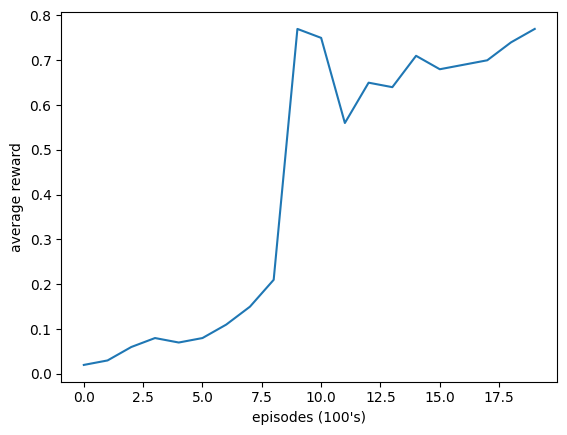

In [77]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()